In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data= pd.read_csv("/content/drive/MyDrive/trustpilot_data.csv")

In [5]:
data.shape

(170, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   review                              170 non-null    object
 1   consumer-information href           170 non-null    object
 2   consumer-avatar                     103 non-null    object
 3   consumer-information__name          170 non-null    object
 4   consumer-information__review-count  170 non-null    object
 5   consumer-information__location      170 non-null    object
 6   star-rating src                     170 non-null    object
 7   review-content-header__dates        170 non-null    object
 8   review-date--tooltip-target         170 non-null    object
 9   link                                170 non-null    object
 10  link href                           170 non-null    object
 11  review-content__text                164 non-null    object

In [7]:
data.head()

,review,consumer-information href,consumer-avatar,consumer-information__name,consumer-information__review-count,consumer-information__location,star-rating src,review-content-header__dates,review-date--tooltip-target,link,link href,review-content__text,button href
0,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/5f11922164b00...,GS,Gautam Sinha,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-06-09T10:02:00+00:00"",""...",2 days ago,A content writing course has to be…,https://www.trustpilot.com/reviews/60c09198f9f...,A content writing course has to be predominant...,https://businessapp.b2b.trustpilot.com/reviews...
1,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60af5ab820923...,RS,radhika sharma,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-05-27T08:42:30+00:00"",""...","May 27, 2021",Content Writing Course Review,https://www.trustpilot.com/reviews/60af5b76f9f...,I am currently pursuing a Content Writing Cour...,https://businessapp.b2b.trustpilot.com/reviews...
2,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60acc24c431bc...,AC,Akash Chaudhary,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-05-25T09:26:11+00:00"",""...","May 25, 2021",Henry Harvin Content Writing Course Review,https://www.trustpilot.com/reviews/60acc2b3f9f...,"Hello Friends I am Akash Chaudhary, Here I am ...",https://businessapp.b2b.trustpilot.com/reviews...
3,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/60a38148150c7...,NS,nidhi sharma,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-05-18T08:57:57+00:00"",""...","May 18, 2021",Henry Harvin Content Writing Course,https://www.trustpilot.com/reviews/60a38195f9f...,After diwali I got the chance to learn various...,https://businessapp.b2b.trustpilot.com/reviews...
4,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/6099077891077...,SS,Shruti Sharma,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2021-05-10T10:14:24+00:00"",""...","May 10, 2021",Henry Harvin content writing course Review,https://www.trustpilot.com/reviews/60990780f9f...,This is my first review about Henry Harvin con...,https://businessapp.b2b.trustpilot.com/reviews...


In [8]:
data.describe(include="all")

,review,consumer-information href,consumer-avatar,consumer-information__name,consumer-information__review-count,consumer-information__location,star-rating src,review-content-header__dates,review-date--tooltip-target,link,link href,review-content__text,button href
count,170,170,103,170,170,170,170,170,170,170,170,164,170
unique,170,170,80,168,3,4,5,170,72,155,170,155,170
top,"{""socialShareUrl"":""https://www.trustpilot.com/...",https://www.trustpilot.com/users/5ba22d884de56...,SK,Kunal Gupta,1 review,IN,https://cdn.trustpilot.net/brand-assets/4.1.0/...,"{""publishedDate"":""2020-10-16T11:34:09+00:00"",""...","Sep 19, 2018",Lean six sigma course is really…,https://www.trustpilot.com/reviews/60279ece679...,The six sigma green belt course was one such i...,https://businessapp.b2b.trustpilot.com/reviews...
freq,1,1,4,2,159,158,127,1,33,4,1,3,1


In [9]:
data.describe().transpose()

,count,unique,top,freq
review,170,170,"{""socialShareUrl"":""https://www.trustpilot.com/...",1
consumer-information href,170,170,https://www.trustpilot.com/users/5ba22d884de56...,1
consumer-avatar,103,80,SK,4
consumer-information__name,170,168,Kunal Gupta,2
consumer-information__review-count,170,3,1 review,159
consumer-information__location,170,4,IN,158
star-rating src,170,5,https://cdn.trustpilot.net/brand-assets/4.1.0/...,127
review-content-header__dates,170,170,"{""publishedDate"":""2020-10-16T11:34:09+00:00"",""...",1
review-date--tooltip-target,170,72,"Sep 19, 2018",33
link,170,155,Lean six sigma course is really…,4


In [10]:
data.isnull()

,review,consumer-information href,consumer-avatar,consumer-information__name,consumer-information__review-count,consumer-information__location,star-rating src,review-content-header__dates,review-date--tooltip-target,link,link href,review-content__text,button href
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,False,False,True,False,False,False,False,False,False,False,False,False,False
166,False,False,True,False,False,False,False,False,False,False,False,False,False
167,False,False,False,False,False,False,False,False,False,False,False,False,False
168,False,False,True,False,False,False,False,False,False,False,False,False,False


In [30]:
df = pd.DataFrame(data ['review-content__text'] , columns= ['review-content__text'])
df.head()

,review-content__text
0,A content writing course has to be predominant...
1,I am currently pursuing a Content Writing Cour...
2,"Hello Friends I am Akash Chaudhary, Here I am ..."
3,After diwali I got the chance to learn various...
4,This is my first review about Henry Harvin con...


In [31]:
# Create a function to clean the trustpilot
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', str (text)) #Removing @mentions
 text = re.sub('#', '', str (text)) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', str (text)) # Removing RT
 text = re.sub('https?:\/\/\S+', '', str (text)) # Removing hyperlink
 text = re.sub('_', '', str (text)) # Removing underscore
 text = re.sub('\n', '', str (text)) # Removing \n
 return text

# Clean the trustpilot
df['review-content__text'] = df['review-content__text'].apply(str)

# Show the cleaned trustpilot
df

,review-content__text
0,A content writing course has to be predominant...
1,I am currently pursuing a Content Writing Cour...
2,"Hello Friends I am Akash Chaudhary, Here I am ..."
3,After diwali I got the chance to learn various...
4,This is my first review about Henry Harvin con...
...,...
165,Henry Harvin offers 2 courses - Business Analy...
166,Worked there as an Intern for a month.Pros: Ni...
167,I really loved Henry Harvin's Content Writing ...
168,"These guys are very unprofessional, don't have..."


In [33]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['review-content__text'].apply(getSubjectivity)
df['Polarity'] = df['review-content__text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,review-content__text,Subjectivity,Polarity
0,A content writing course has to be predominant...,0.597381,0.360159
1,I am currently pursuing a Content Writing Cour...,0.633333,0.430769
2,"Hello Friends I am Akash Chaudhary, Here I am ...",0.687500,0.404167
3,After diwali I got the chance to learn various...,0.670370,0.403704
4,This is my first review about Henry Harvin con...,0.482035,0.379004
...,...,...,...
165,Henry Harvin offers 2 courses - Business Analy...,0.406034,0.076365
166,Worked there as an Intern for a month.Pros: Ni...,0.743506,0.478528
167,I really loved Henry Harvin's Content Writing ...,0.725000,0.662500
168,"These guys are very unprofessional, don't have...",0.200000,0.066667


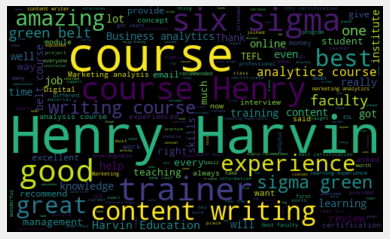

In [46]:
# word cloud visualization
allWords = ' '.join([revws for revws in df['review-content__text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,review-content__text,Subjectivity,Polarity,Analysis
0,A content writing course has to be predominant...,0.597381,0.360159,Positive
1,I am currently pursuing a Content Writing Cour...,0.633333,0.430769,Positive
2,"Hello Friends I am Akash Chaudhary, Here I am ...",0.687500,0.404167,Positive
3,After diwali I got the chance to learn various...,0.670370,0.403704,Positive
4,This is my first review about Henry Harvin con...,0.482035,0.379004,Positive
...,...,...,...,...
165,Henry Harvin offers 2 courses - Business Analy...,0.406034,0.076365,Positive
166,Worked there as an Intern for a month.Pros: Ni...,0.743506,0.478528,Positive
167,I really loved Henry Harvin's Content Writing ...,0.725000,0.662500,Positive
168,"These guys are very unprofessional, don't have...",0.200000,0.066667,Positive


In [37]:
# Printing positive reviews 
print('Printing positive reviews:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the reviews
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['review-content__text'][i])
    print()
    j= j+1

Printing positive reviews:

1) A content writing course has to be predominantly about writing. The Henry Harvin course gets this absolutely right. Their entire course is structured around developing your writing skills. It's a very well spaced out and well planned course. The trainer, Tulika Kiran is exceptional and covers every aspect of writing and is very patient. Henry Harvin Content Writing Course, trains you as a writer, increases your confidence to express your creative side. The thrill that you get when you post what you have written is priceless. The modules are well structured and suitable for people from varied backgrounds. It definitely is not a fake site. I would recommend it to anyone who is passionate about writing and wants to hone their skills. It's 100% genuine. If writing is your passion and you want to learn the nuances of writing, the Henry Harvin course is the most beneficial one available and it's totally worth it.

2) I am currently pursuing a Content Writing Co

In [39]:
# Printing negative reviews  
print('Printing negative reviews:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the reviews
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['review-content__text'][i])
    print()
    j=j+1

Printing negative reviews:

1) I'm having a unpleasant experience at Henry Harvin. All they care about is money. After fee payment, nobody listens to your grievances. No reply to mails or on whatsapp. Highly unprofessional and money minded. Extremely disappointed.

2) ReskillBeing a person from the field of communications and marketing, i discovered that i only knew about digital content writing in bits and pieces till I enrolled for the course.  There is a systematic process of brushing up on basics and learning the tips and tricks.  Applying LearningsKnowledge never goes waste as long as you apply it in real life and one learn about this hands-on in this programme.  ApplicationHighly recommended for those who want to adapt to Writing and Communication in Digital times.

3) It's a crap course. Don't fall for their fake and false high promises. The whole course is time and money wastage. I wasted my precious time and money. They didn't give any internship or placement as they promise.


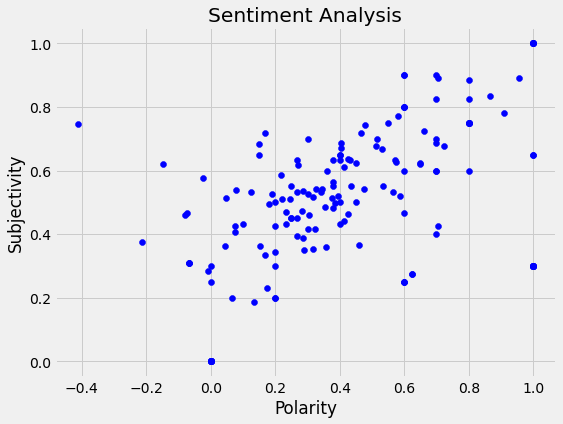

In [40]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [41]:
# Print the percentage of positive reviews
p_reviews = df[df.Analysis == 'Positive']
p_reviews = p_reviews['review-content__text']
p_reviews

round( (p_reviews.shape[0] / df.shape[0]) * 100 , 1)

85.9

In [43]:
# Print the percentage of negative reviews
n_reviews = df[df.Analysis == 'Negative']
n_reviews = n_reviews['review-content__text']
n_reviews

round( (n_reviews.shape[0] / df.shape[0]) * 100, 1)

5.9

In [44]:
# Show the value counts
df['Analysis'].value_counts()

Positive    146
Neutral      14
Negative     10
Name: Analysis, dtype: int64

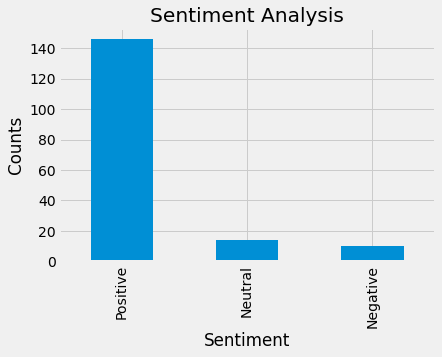

In [45]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()